In [1]:
# importamos librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn


# librerías para audio y utilidades
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [4]:
# definimos la ruta al dataset
import os

# WORKING_DIR = os.getcwd()
WORKING_DIR = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
DATA_ROOT_DIR = os.path.join(WORKING_DIR, 'data')
DATA_MUSIC_DIR = os.path.join(DATA_ROOT_DIR, 'genres_original')

In [5]:
# mostramos la lista de directorios del data set
print(os.listdir(f'{DATA_MUSIC_DIR}'))

['classical', 'country', 'disco', 'reggae', 'metal', 'blues', 'pop', 'jazz', 'rock', 'hiphop', '.gitkeep']


In [5]:
ipd.Audio(f'{DATA_MUSIC_DIR}/reggae/reggae.00000.wav')

In [6]:
y, sr = librosa.load(f'{DATA_MUSIC_DIR}/reggae/reggae.00000.wav')

print('y:', y)
print('y shape:', y.shape)
print('Sample Rate (KHz):', sr)

print("audio len:", y.shape[0]/sr)

y: [ 0.01037598  0.00775146  0.03887939 ... -0.06652832 -0.05062866
 -0.03564453]
y shape: (661794,)
Sample Rate (KHz): 22050
audio len: 30.013333333333332


In [7]:
# quitamos el silencio final e inicial del audio.
audio_file, _ = librosa.effects.trim(y)

In [8]:
# mostramos los resultados

print('audio file:', audio_file)
print('audio file shape:', audio_file.shape)
print("audio file trimed len:", audio_file.shape[0]/sr)

audio file: [ 0.01037598  0.00775146  0.03887939 ... -0.06652832 -0.05062866
 -0.03564453]
audio file shape: (661794,)
audio file trimed len: 30.013333333333332


## 2D representation: Sound Waves

Text(0.5, 1.0, 'Sound Waves in Raggae 00')

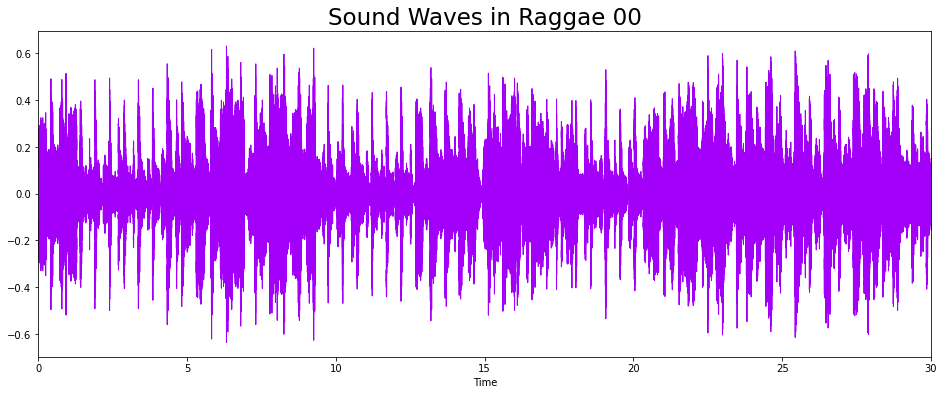

In [9]:
plt.figure(figsize=(16, 6))
librosa.display.waveplot(y=audio_file,
                        sr=sr, color="#A300F9")
plt.title("Sound Waves in Raggae 00", fontsize=23)

In [10]:
# Default FFT window size
n_fft = 2048  # windows size
hop_length = 512  # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft=n_fft, hop_length=hop_length))

print('Shape of D object:', D.shape)


Shape of D object: (1025, 1293)


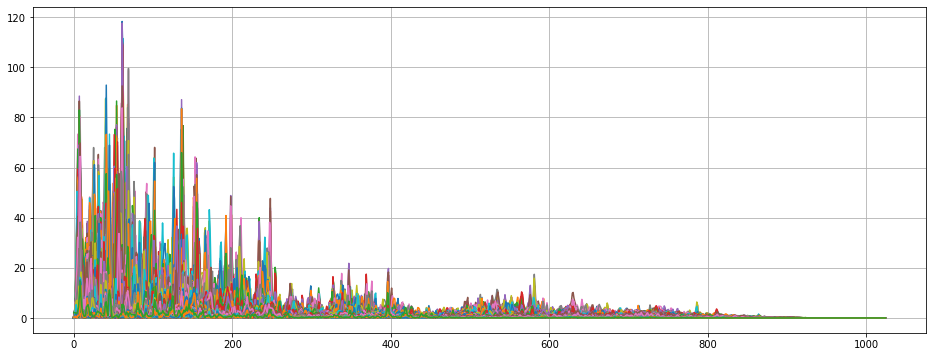

In [11]:
plt.figure(figsize=(16, 6))
plt.plot(D)
plt.grid(True)

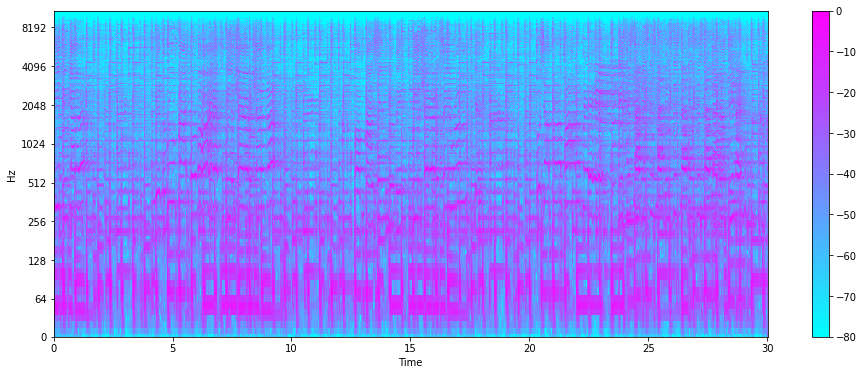

In [12]:
# Convert an amplitude spectogram to Decibels-scaled spectogram
DB = librosa.amplitude_to_db(D, ref=np.max)

# Creating the spectogram
plt.figure(figsize=(16, 6))
librosa.display.specshow(DB,sr=sr, hop_length=hop_length, x_axis='time', y_axis='log',
                         cmap='cool')
plt.colorbar()
plt.show()

## Mel Spectrogram

  > The Mel Scale, mathematically speaking, is the result of some non-linear transformation of the frequency scale. The Mel Spectrogram is a normal Spectrogram, but with a Mel Scale on the y axis.

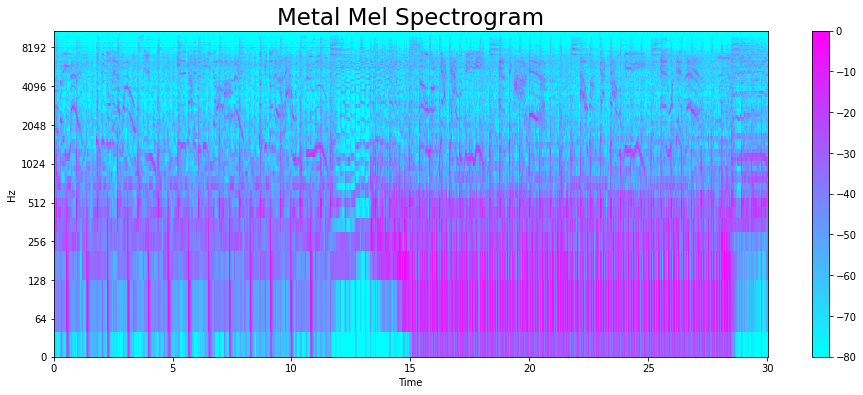

In [13]:
y, sr = librosa.load(f'{DATA_MUSIC_DIR}/metal/metal.00036.wav')
y, _ = librosa.effects.trim(y)

S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize=(16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log',
                         cmap='cool')
plt.colorbar();
plt.title("Metal Mel Spectrogram", fontsize=23)
plt.show()

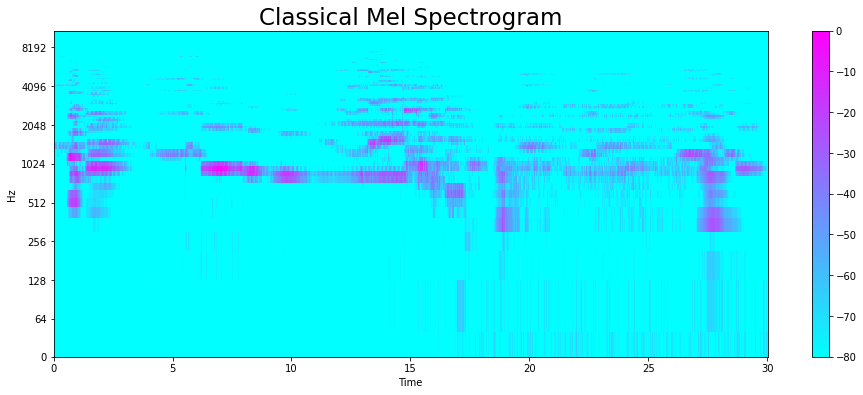

In [14]:
y, sr = librosa.load(f'{DATA_MUSIC_DIR}/classical/classical.00036.wav')
y, _ = librosa.effects.trim(y)

S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize=(16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log',
                         cmap='cool')
plt.colorbar();
plt.title("Classical Mel Spectrogram", fontsize=23)
plt.show()

# Audio Features

## Zero Crossing rate

  > The rate which the signal changes from positive to negative or back

In [15]:
# total zero_crossing in our 1st song
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print(sum(zero_crossings))

64827


## Harmonics and Perceptrual

  >   * Harmonics are characteristichs that human ears can't distinguish (represents the sound color)
  >   * Percetrual understanding shock wave represents the sound rhythm and emotion

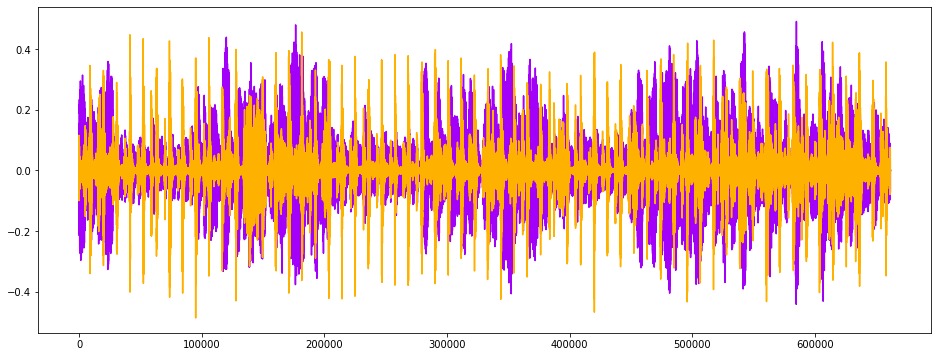

In [16]:
y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize=(16, 6))
plt.plot(y_harm, color='#A300F9')
plt.plot(y_perc, color='#FFB100')
plt.show()

## Tempo BMP (beats per minute)

Dynamic programming beat tracker

In [17]:
tempo, _ = librosa.beat.beat_track(y, sr=sr)
tempo

107.666015625

## Spectral Centroid

Indicates where the "centre of mass" for a sound is located and is calculated as the weighted mean of the requencies present in the sound.

In [18]:
# Calculate the spectral centroids

spectral_centroids = librosa.feature.spectral_centroid(audio_file, sr=sr)[0]

# shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# computing the time variable for visualization
frames = range(len(spectral_centroids))

# Convert frame counts to time (seconds)
t = librosa.frames_to_time(frames)
print ('frames:', frames, '\n')
print('t:', t)

Centroids: [2335.10033335 2629.27084952 2734.69273729 ... 2039.58289998 2045.0765528
 1918.94605155] 

Shape of Spectral Centroids: (1293,) 

frames: range(0, 1293) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]


In [19]:
# Function that normalizes the sound data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

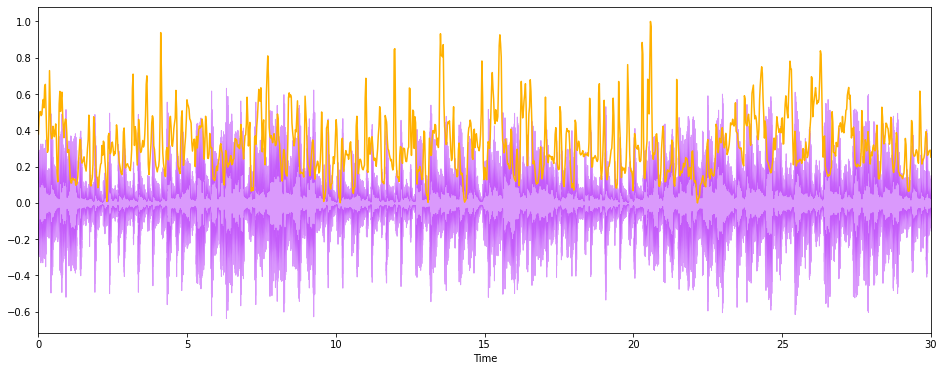

In [20]:
# Ploting the spectral centroid along the waveform
plt.figure(figsize=(16, 6))
librosa.display.waveplot(audio_file, sr=sr, alpha=0.4, color='#A300F9')
plt.plot(t, normalize(spectral_centroids), color='#FFB100')
plt.show()

## Spectral Rolloff

Is a measure of the shape of the signal. It represets the frequency below which a specified percentage of the total spectral energy, e.g, 85%, lies


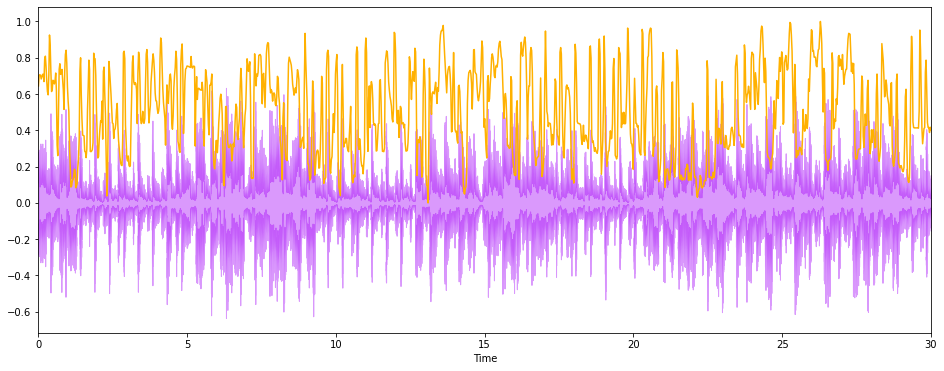

In [21]:
# Spectral Rolloff Vector
spectral_rolloff = librosa.feature.spectral_rolloff(audio_file, sr=sr)[0]

# The plot
plt.figure(figsize=(16, 6))
librosa.display.waveplot(audio_file, sr=sr, alpha=0.4, color='#A300F9')
plt.plot(t, normalize(spectral_rolloff), color='#FFB100')
plt.show()

## mel-Frequency Cepstral coefficients

The mel fequency ceptral coefficients (MFCCs) of a signal are a small set of features (usually about 10-20) which concisely describe the overall shape of spectral envelope. It models the characteristics of the human voice.

mfcc shape: (20, 1293)


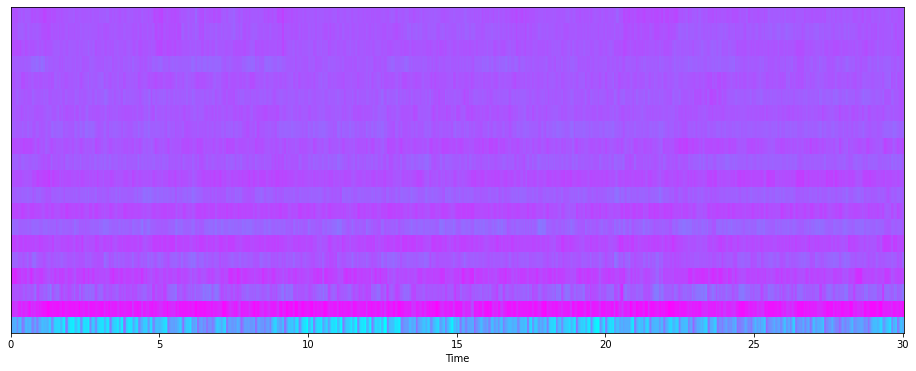

In [22]:
mfccs = librosa.feature.mfcc(audio_file, sr=sr)
print('mfcc shape:', mfccs.shape)

# Displaying the MFCCs
plt.figure(figsize=(16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap='cool')
plt.show()

Data needs to be scaled


Mean:  1.7701611e-09
Var: 1.0


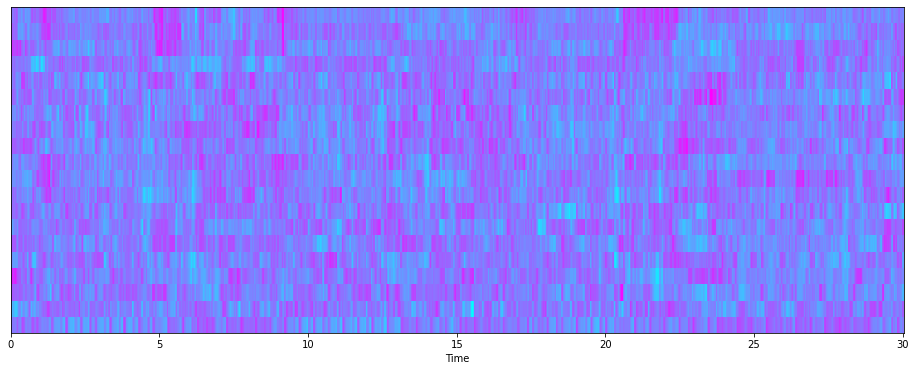

In [23]:
# perform feature scaling

mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print('Mean: ', mfccs.mean())
print('Var:', mfccs.var())

plt.figure(figsize=(16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap='cool')
plt.show()

## Chroma Frequencies

Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave


Chromagram shape: (12, 133)


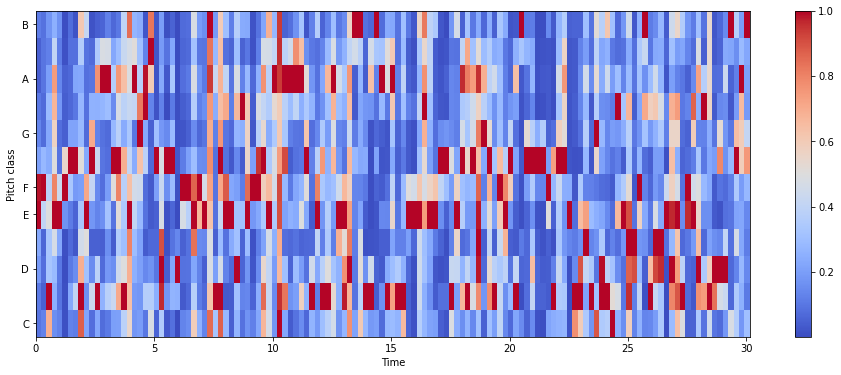

In [24]:
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 5000

# chromagram
chromagram = librosa.feature.chroma_stft(audio_file, sr=sr, hop_length=hop_length)
print('Chromagram shape:', chromagram.shape)

plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length,
                         cmap='coolwarm')
plt.colorbar()
plt.show()

## EDA

EDA is going to be performed on the `features_30.sec.csv'. This file contains the mean and varianse for each audio file for the features analysed above.

so, the table has a final of 1000 rows (10 genrex x 100 audiofiles= and 60 features (dimensionalities)


In [28]:
data = pd.read_csv(f'{DATA_ROOT_DIR}/features_30_sec.csv')
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


## Correlation heatmap for features means

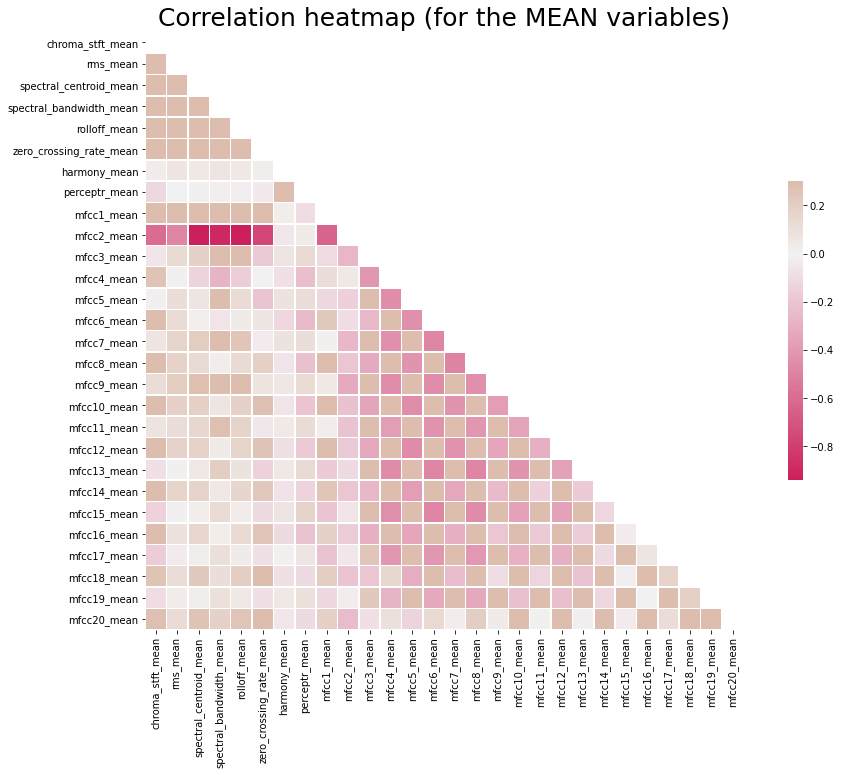

In [31]:
# computing the correlation matrix
spike_cols = [col for col in data.columns if 'mean' in col]
corr = data[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool_))

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11))

# generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s=90, l=45, n=5)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation heatmap (for the MEAN variables)", fontsize=25)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.savefig("corr_heatmap.jpg")
plt.show()

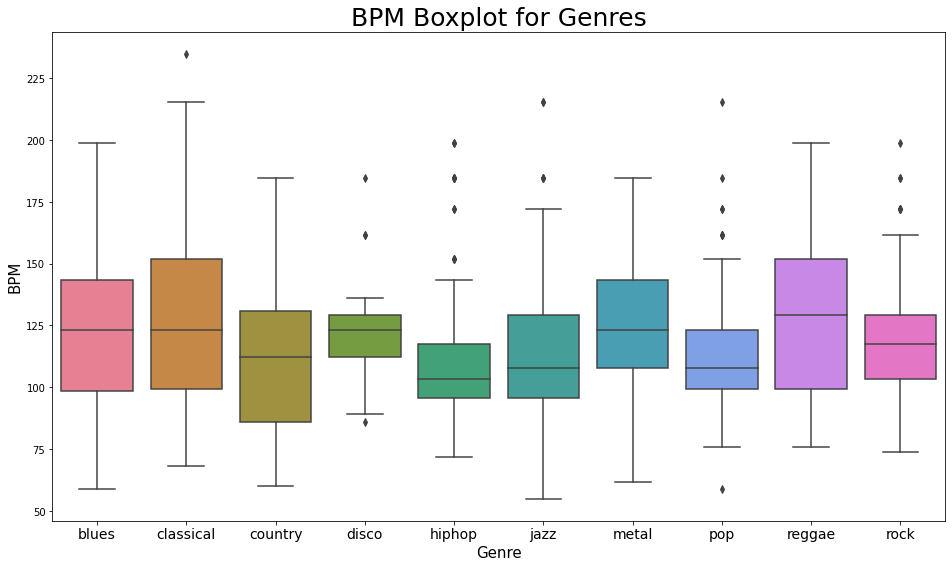

In [32]:
## Box plot for gendres distributions
x = data[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9))
sns.boxplot(x="label", y="tempo", data=x, palette='husl')

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
# plt.savefig("BPM Boxplot.jpg")
plt.show()

## Principal Component Analysis - to visualize possible groups of genres

  1. Normalization
  2. PCA
  3. The Scatter Plot



In [33]:
from sklearn import preprocessing


data = data.iloc[0:, 1:]
y = data['label']
X = data.iloc[:, data.columns != 'label']

# NORMALIZE
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns=cols)

In [34]:
# PCA 2 COMPONENTS
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponentes = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponentes, columns=['PCA1', 'PCA2'])

finalDF = pd.concat([principalDf, y], axis=1)

pca.explained_variance_ratio_

array([0.2439355 , 0.21781804])

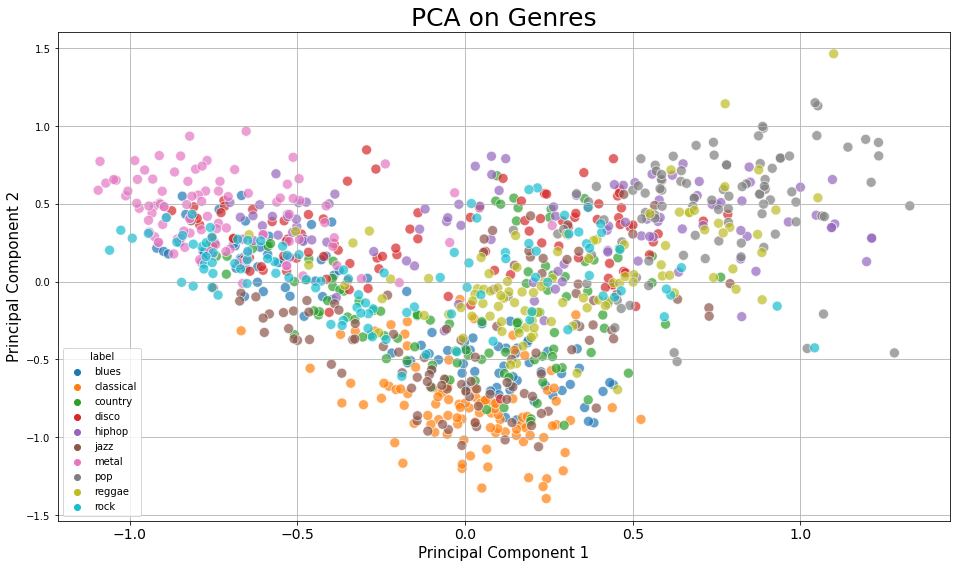

In [37]:
plt.figure(figsize=(16, 9))
sns.scatterplot(x="PCA1", y="PCA2", data=finalDF,
                hue="label", alpha=0.7, s=100)

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.grid(True)
# plt.savefig("PCA Scattert.jpg")